In [1]:
img='../CovidWOBPDFs/5d03dc8b8621ea5e53ad6fe7b44c8533_wob-verzoek-inz-coronamaatregelen-op-scholen-17-30_1.png'

In [7]:
#!pip install opencv-python
#!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=18843 sha256=b9760e99cdbfaba07258d654460f0334f6bad40a1ad62a5f14dd6ed489b32f66
  Stored in directory: /Users/admin/Library/Caches/pip/wheels/c6/3a/30/877d14dc50fb68f107b18247a31db742518c6f74f64de8dde8
Successfully built pytesseract
You should consider upgrading via the '/Users/admin/anaconda/envs/python3.6/bin/python -m pip install --upgrade pip' command.


In [8]:
import cv2 
import pytesseract

In [ ]:
img = cv2.imread(img)

In [13]:
# Adding custom options
#custom_config = r'--oem 3 --psm 6'
t=pytesseract.image_to_string(img, config=custom_config)
print(t)

173
Van: Yes EG ca |
Verzonden: maandag 25 januari 2021 17:48
Aan: eaten ee cer ea
cc: ee ee ae eae
Onderwerp: RE: Overzicht buurlanden + Scandinavische landen (wanneer mogelijk)
Bijlagen: Overzicht maatregelen buurlanden.docx
Hall Qa,
Bij deze het gevraagde overzicht, met input vanuit IB/buurlandenteam.
Voor nu alvast een hele fijne avond gewenst!
Groet,
=
Van: (San |
Verzonden: woensdag 20 januari 2021 10:14
Aan: a ea
CC ia eee
Onderwerp: Overzicht buurlanden + Scandinavische landen (wanneer mogelijk)
Ha a Cn
Ik heb vanochtend even met het kernteam Covid gesproken over het internationale overzicht voor
volgende week en we komen tot de volgende onderwerpen die op dit moment relevant zijn:
- PO/VO Scholen open/dicht & voorwaarden heropening etc. (volgens mij volstaat hier een kleine
update van het vorige overzicht)
- Gebruik van Persoonlijke beschermingsmiddelen in het onderwijs (n.a.v. discussie die loopt in
Duitsland)
- Of er al duidelijkheid is over eindexamens; deze discussie speel

In [24]:
imgs= !ls ../CovidWOBPDFs
imgs=[l for l in imgs if l.endswith('.png')]
len(imgs)

52697

In [23]:
%%time
## ocr 1000 page
OCR_dict={file:pytesseract.image_to_string('../CovidWOBPDFs/'+file, config=custom_config) for file in imgs}

CPU times: user 1.93 s, sys: 5.75 s, total: 7.67 s
Wall time: 12min 52s


In [27]:
import pandas as pd

df= pd.Series(OCR_dict)
df.to_csv('OCRsample1000bladzijden.csv')

In [28]:
!ls -lh

total 2384
-rw-r--r--  1 admin  staff   156K Nov 26 20:29 CollectPDFs.ipynb
-rw-r--r--  1 admin  staff   302K Nov 28 15:20 FontVectorPerPaginaEnDanMaarClusteren.ipynb
-rw-r--r--  1 admin  staff    78K Nov 28 20:38 OCR_tesseract.ipynb
-rw-r--r--  1 admin  staff   425K Nov 28 20:50 OCRsample1000bladzijden.csv
-rw-r--r--  1 admin  staff   219K Nov 28 13:56 test.xml


In [33]:
# lengte van de strings per png image.
# dat is dus heel erg kort

df.str.len().describe()

count    1000.000000
mean      371.714000
std       335.546431
min         1.000000
25%       182.500000
50%       400.000000
75%       539.000000
max      3554.000000
dtype: float64

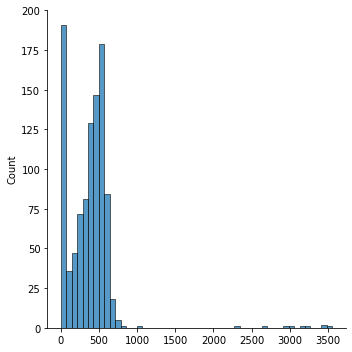

In [35]:
%matplotlib inline
import seaborn as sns

sns.displot(df.str.len());